In [274]:
from pharynx_redox import (
    pharynx_io as pio, 
    image_processing as ip, 
    experiment, 
    plots, 
    profile_processing,
    data_analysis as da,
    utils
)

import xarray as xr
from pathlib import Path
from tqdm import tqdm_notebook
import seaborn as sns
from importlib import reload
import numpy as np
import logging
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import skfda
from skfda.representation import FDataGrid, FDataBasis
from scipy import ndimage as ndi
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap

reload(logging)
reload(experiment)
reload(pio)
reload(ip)
reload(plots)
reload(profile_processing)
reload(da)
reload(utils)

pd.set_option('display.max_rows', 100)

logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S')

In [275]:
params = dict(
    experiment_dir=Path("/Users/sean/code/pharynx_redox/data/paired_ratio/2017_02_22-HD233_SAY47/"),
    imaging_scheme="TL/470/410/470/410"
)

# ex_unreg = experiment.PairExperiment(register=False, **params).full_pipeline()
ex_reg = experiment.PairExperiment(register=True, **params).full_pipeline()

03:51:14 INFO:Starting full pipeline run for /Users/sean/code/pharynx_redox/data/paired_ratio/2017_02_22-HD233_SAY47
03:51:14 INFO:Segmenting pharynxes
03:51:15 INFO:Centering and rotating pharynxes


03:51:26 INFO:Calculating midlines


03:51:27 INFO:Measuring under midlines


03:51:29 INFO:Registering profiles


03:53:22 INFO:Trimming intensity data
03:53:23 INFO:Calculating redox measurements
03:53:23 INFO:Saving 2017_02_22-HD233_SAY47 inside /Users/sean/code/pharynx_redox/data/paired_ratio/2017_02_22-HD233_SAY47
03:53:23 INFO:Saving region means to /Users/sean/code/pharynx_redox/data/paired_ratio/2017_02_22-HD233_SAY47/analyses/2019-09-11_frame_specific_midlines_with_registration/2017_02_22-HD233_SAY47-summary_table.csv
03:53:23 INFO:Saving profile data to /Users/sean/code/pharynx_redox/data/paired_ratio/2017_02_22-HD233_SAY47/analyses/2019-09-11_frame_specific_midlines_with_registration/2017_02_22-HD233_SAY47-profile_data.nc
03:53:23 INFO:Finished full pipeline run for /Users/sean/code/pharynx_redox/data/paired_ratio/2017_02_22-HD233_SAY47


In [276]:
i410_0 = ex_unreg.trimmed_profiles.sel(wavelength='410', pair=0)
i470_0 = ex_unreg.trimmed_profiles.sel(wavelength='470', pair=0)
i410_1 = ex_unreg.trimmed_profiles.sel(wavelength='410', pair=1)
i470_1 = ex_unreg.trimmed_profiles.sel(wavelength='470', pair=1)

r410_0 = ex_reg.trimmed_profiles.sel(wavelength='410', pair=0)
r470_0 = ex_reg.trimmed_profiles.sel(wavelength='470', pair=0)
r410_1 = ex_reg.trimmed_profiles.sel(wavelength='410', pair=1)
r470_1 = ex_reg.trimmed_profiles.sel(wavelength='470', pair=1)

In [186]:
all_mvmt = da.load_all_movement("/Users/sean/code/pharynx_redox/data/paired_ratio")

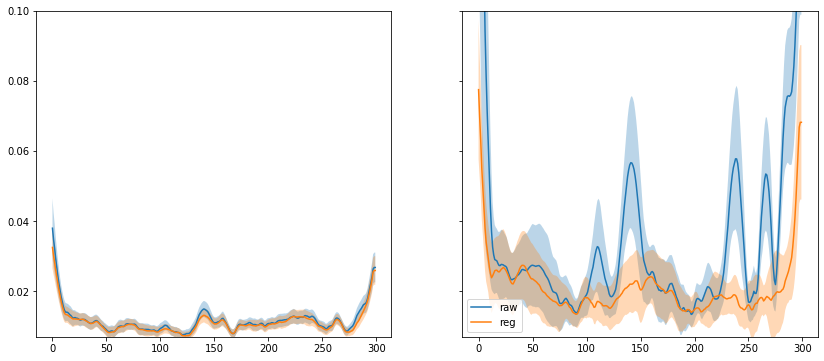

In [277]:
rr_reg = (np.abs(1-((r410_0/r470_0)/(r410_1/r470_1))))
rr_raw = (np.abs(1-((i410_0/i470_0)/(i410_1/i470_1))))

fig, ax = plt.subplots(1,2,figsize=(14,6), sharey='all');
plots.plot_profile_avg_with_bounds(rr_raw[stationary], ax=ax[0], label='raw');
plots.plot_profile_avg_with_bounds(rr_reg[stationary], ax=ax[0], label='reg');

plots.plot_profile_avg_with_bounds(rr_raw[moving], ax=ax[1], label='raw');
plots.plot_profile_avg_with_bounds(rr_reg[moving], ax=ax[1], label='reg');

plt.ylim(0.007,0.1);
plt.legend();